Import numpy and pandas libraries for data cleaning and management

In [2]:
import numpy as np
import pandas as pd

In [3]:
#read malnutriton file
data = pd.read_csv(r"C:\Users\ALI LAPTOP LAB\Desktop\Data Science Projects\Visualization\mal_dataset.csv")
print('File load successfuly!')

File load successfuly!


In [4]:
#convert data into dataframes
df = pd.DataFrame(data)    #if file is .csv, not need to convert it into dataframe

### Data preprocessing

In [5]:
#have a look on data
df.head()

,SAMPLE,SAMPLESTR,COUNTRY,YEAR,URBAN,WKCURRJOB,WEALTHQUR,EDUCLVL,DECBIGHH,HWWHZNCHS,HWWAZNCHS,HWHAZNCHS
0,58604,58604,586,2017,2,0,1,2,40,-73,-235,-323
1,58604,58604,586,2017,2,0,2,2,50,9999,9999,9999
2,58604,58604,586,2017,2,0,2,3,50,9999,9999,9999
3,58604,58604,586,2017,2,0,2,0,50,9999,9999,9999
4,58604,58604,586,2017,2,0,2,0,50,9999,9999,9999


I am trying to see the impact of "Women Empowerment Variables" on nutrition level of Children.
Here, independent variables are URBAN, WKCURRJOB, WEALTH, WEALTHQUR and EDUCLVL.
and the dependent variables are HWWHZNCHS, HWWAZNCHS and HWHAZNCHS.

In [6]:
#column SAMPLE, SAMPLESTR, COUNTRY and YEAR are useless for us. So, delete these columns
deleted_Columns = ['SAMPLE', 'SAMPLESTR', 'COUNTRY' , 'YEAR']

#selected columns deleted
check =df.drop(deleted_Columns, axis=1, inplace=True)

#see the columns are deleted.
df.columns

Index(['URBAN', 'WKCURRJOB', 'WEALTHQUR', 'EDUCLVL', 'DECBIGHH', 'HWWHZNCHS',
       'HWWAZNCHS', 'HWHAZNCHS'],
      dtype='object')

Change variable name:

**************Dependent variables************

HWHAZNCHS	-> stunted

HWWAZNCHS	-> underweight

HWWHZNCHS	-> wasted

************Independent variables***********

URBAN -> residence

WEALTHQUR -> wealthStatus

EDUCLVL -> eduStatus

WKCURRJOB -> workStatus

DECBIGHH -> emp

In [7]:
#change the columns names
df.rename(columns={'HWHAZNCHS':'stunted',
                   'HWWAZNCHS':'underweight',
                   'HWWHZNCHS':'wasted',
                   'URBAN':'residence',
                   'WEALTHQUR':'wealthStatus',
                   'EDUCLVL':'eduStatus',
                   'WKCURRJOB':'workStatus',
                   'DECBIGHH':'emp'}, inplace=True)
print('Names are succesfully changes\n', df.columns)

Names are succesfully changes
 Index(['residence', 'workStatus', 'wealthStatus', 'eduStatus', 'emp', 'wasted',
       'underweight', 'stunted'],
      dtype='object')


In [8]:
#check the unique values for independent variables
print(df.residence.unique(), '\n')
print(df.workStatus.unique(), '\n')
print(df.wealthStatus.unique(), '\n')
print(df.eduStatus.unique(), '\n')
print(df.emp.unique())

[2 1] 

[ 0 10 52 51 22 40 98 30 21] 

[1 2 3 4 5] 

[2 3 0 1] 

[40 50 20 10 99 60 98]


##### Manipulation of Independent Variables

Detailed Info of varaibles

residence -->	0 = Rural; 1 = Urban

workStatus --> 0 = Not Currently Working; 1 = Agricultural; 2 = White Collar; 3 = Blue Collar 

wealthStatus --> 1 = Poorest; 2 = Poorer; 3 = Middle; 4 = Richer; 5 = Richest

eduStatus -->  0 = Not Education; 1 = Primary; 2 = Secondary; 3 = Higher

emp -->  0 = Not Empowered; 1 = Empowered

In [9]:
#change residence columns values ----- 2 into 0
print("Before Manipulation of values")
print(df.residence.value_counts())

#change values
for item in range(len(df.residence)):
    if (df.residence[item] == 2):
        df.residence[item] = 0

print("\nAfter Manipulation of values")
print(df.residence.value_counts())

Before Manipulation of values
2    7099
1    5609
Name: residence, dtype: int64

After Manipulation of values
0    7099
1    5609
Name: residence, dtype: int64


In [10]:
#change workStatus columns values ----- 30 into 1 ..... 10,21,22 into 2 ....... 40,51,52,98 into 3
print("Before Manipulation of values")
print(df.workStatus.value_counts())

#change values
for item in range(len(df.workStatus)):
    if (df.workStatus[item] == 30):
        df.workStatus[item] = 1
    elif ((df.workStatus[item] == 10) | (df.workStatus[item] == 21) | (df.workStatus[item] == 22)):
        df.workStatus[item] = 2
    elif ((df.workStatus[item] == 40) | (df.workStatus[item] == 51) | (df.workStatus[item] == 52) | (df.workStatus[item] == 98)):
        df.workStatus[item] = 3

print("\nAfter Manipulation of values")
print(df.workStatus.value_counts())

Before Manipulation of values
0     11019
51      587
30      460
10      338
40      178
52       74
22       40
21        7
98        5
Name: workStatus, dtype: int64

After Manipulation of values
0    11019
3      844
1      460
2      385
Name: workStatus, dtype: int64


In [11]:
#change emp columns values ----- 10,20 into 1 ..... 40,50,60,99 into 0
print("Before Manipulation of values")
print(df.emp.value_counts())

#change values
for item in range(len(df.emp)):
    if ( (df.emp[item] == 10) | (df.emp[item] == 20) ):
        df.emp[item] = 1
    elif ((df.emp[item] == 40) | (df.emp[item] == 50) | (df.emp[item] == 60) | (df.emp[item] == 99) | (df.emp[item] == 98)):
        df.emp[item] = 0

print("\nAfter Manipulation of values")
print(df.emp.value_counts())

Before Manipulation of values
40    5234
20    3980
50    2264
60     566
10     522
99     140
98       2
Name: emp, dtype: int64

After Manipulation of values
0    8206
1    4502
Name: emp, dtype: int64


#### Manipulation of Dependent variables 

Now, convert the values of dependent variables.

According to WHO Z-score is below than -2 standard deviation than reference population are considered stunted, wastied and underweight

In [12]:
#change stunted columns values ----- stunted=1 if stunted < -200 ..... stunted=0 if stunted > -200 & stunted < 9999
for item in range(len(df.stunted)):
    if ( (df.stunted[item] <= -200) ):
        df.stunted[item] = 1
    elif ( (df.stunted[item] > -200) | (df.stunted[item] <= 9999) ):
        df.stunted[item] = 0

print("Stunted After Manipulation of values")
print(df.stunted.value_counts())

Stunted After Manipulation of values
0    11334
1     1374
Name: stunted, dtype: int64


In [13]:
#change wasted columns values 
#    wasted=1 if wasted <= -200 
#    wasted=0 if wasted > -200 & wasted <= 9999
for item in range(len(df.wasted)):
    if ( (df.wasted[item] <= -200) ):
        df.wasted[item] = 1
    elif ( (df.wasted[item] > -200) | (df.wasted[item] <= 9999) ):
        df.wasted[item] = 0

print("Wasted After Manipulation of values")
print(df.wasted.value_counts())

Wasted After Manipulation of values
0    12427
1      281
Name: wasted, dtype: int64


In [14]:
#change underweight columns values
#    underweight=1 if underweight <= -200 
#    underweight=0 if underweight > -200 & underweight <= 9999
for item in range(len(df.underweight)):
    if ( (df.underweight[item] <= -200) ):
        df.underweight[item] = 1
    elif ( (df.underweight[item] > -200) | (df.underweight[item] <= 9999) ):
        df.underweight[item] = 0

print("underweight After Manipulation of values")
print(df.underweight.value_counts())

underweight After Manipulation of values
0    11646
1     1062
Name: underweight, dtype: int64


### End of Preprocessing

In [89]:
#see the head of data
df.head()

,residence,workStatus,wealthStatus,eduStatus,emp,wasted,underweight,stunted
0,2,0,1,2,0,0,1,1
1,2,0,2,2,0,0,0,0
2,2,0,2,3,0,0,0,0
3,2,0,2,0,0,0,0,0
4,2,0,2,0,0,0,0,0


In [90]:
#it tell the
# 1. Total number of obs.
# 2. count of missing values
# 3. Type of data

df.info()

# See there is no missing value in our data and number of obs = 12708

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12708 entries, 0 to 12707
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   residence     12708 non-null  int64
 1   workStatus    12708 non-null  int64
 2   wealthStatus  12708 non-null  int64
 3   eduStatus     12708 non-null  int64
 4   emp           12708 non-null  int64
 5   wasted        12708 non-null  int64
 6   underweight   12708 non-null  int64
 7   stunted       12708 non-null  int64
dtypes: int64(8)
memory usage: 794.4 KB


### Data  Visualization 

In [421]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
#print(dir(sns))

In [109]:
#help(sns.pairplot)

##### Line plot
is used to check the trends of the varaibles


<AxesSubplot:title={'center':'Shows relation b/w all independent variables and stunted'}, xlabel='residence', ylabel='stunted'>

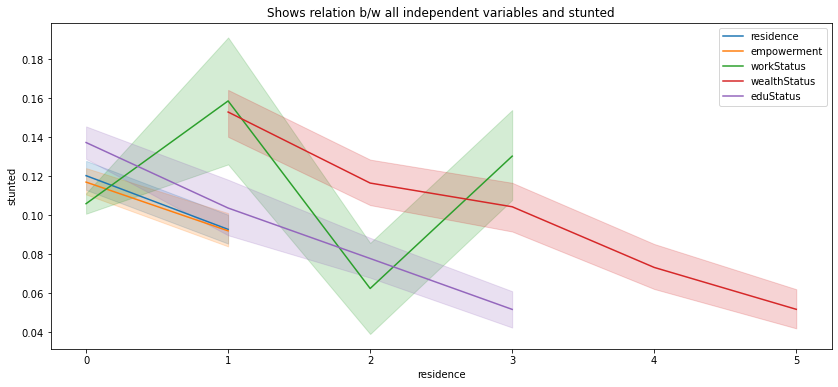

In [111]:
#compare all independent variables with the stunted(dependent) variables

#set the size of the figure
plt.figure(figsize=(14,6))
#set the title of the figure
plt.title("Shows relation b/w all independent variables and stunted")


sns.lineplot(x=df.residence, y= df.stunted, label="residence")
sns.lineplot(x=df.emp, y= df.stunted, label="empowerment")
sns.lineplot(x=df.workStatus, y= df.stunted, label="workStatus")
sns.lineplot(x=df.wealthStatus, y= df.stunted, label="wealthStatus")
sns.lineplot(x=df.eduStatus, y= df.stunted, label="eduStatus")


<AxesSubplot:title={'center':'Shows relation b/w all independent variables and wasted'}, xlabel='residence', ylabel='wasted'>

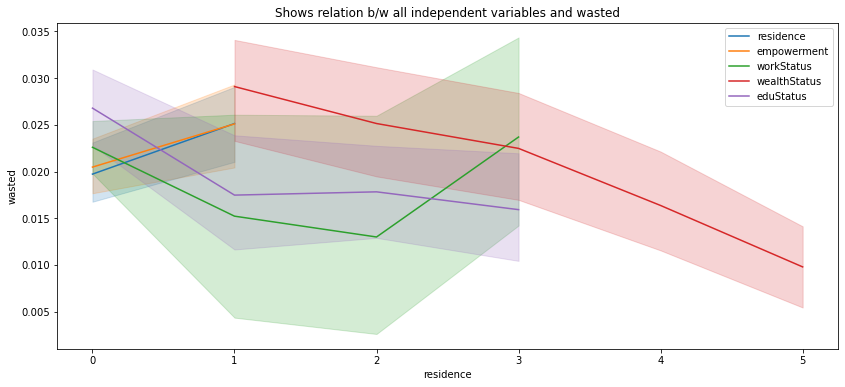

In [112]:
#compare all independent variables with the wasted(dependent) variables

#set the size of the figure
plt.figure(figsize=(14,6))
#set the title of the figure
plt.title("Shows relation b/w all independent variables and wasted")


sns.lineplot(x=df.residence, y= df.wasted, label="residence")
sns.lineplot(x=df.emp, y= df.wasted, label="empowerment")
sns.lineplot(x=df.workStatus, y= df.wasted, label="workStatus")
sns.lineplot(x=df.wealthStatus, y= df.wasted, label="wealthStatus")
sns.lineplot(x=df.eduStatus, y= df.wasted, label="eduStatus")

<AxesSubplot:xlabel='workStatus', ylabel='underweight'>

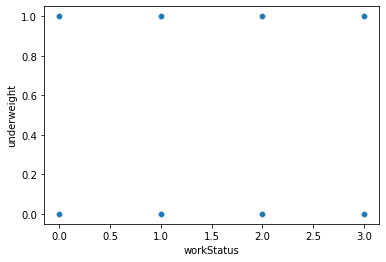

In [124]:
#scatter plot is also used to check relatinship between two varaibles
sns.scatterplot(x=df.workStatus, y= df.underweight)

<AxesSubplot:xlabel='residence', ylabel='underweight'>

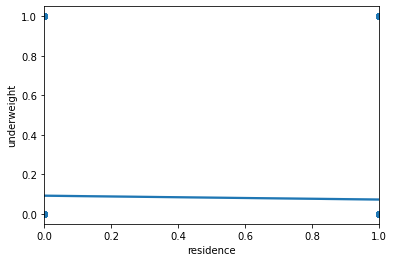

In [422]:
#to double check the scatter plot relation, regplot is also used as it add regression line
sns.regplot(x=df.residence, y= df.underweight, label="residence")

### Modeling of data
First use **Stunted variable** in th modeling 

In [15]:
#select the target(dependent) variable
y = df.stunted

#select the featured(independent) variables
mal_features = ['residence', 'workStatus', 'wealthStatus', 'eduStatus', 'emp']
x = df[mal_features]

Every model is divide into 4 parts:
1. ##### Define a model
2. ##### Fit the model
3. ##### Predict the model
4. ##### Evaluate the model

I start by applying
##### 1. Decison Tree model

In [28]:
#apply train test split
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(x,y,train_size = 0.7, test_size = 0.3, random_state=0)

In [29]:
#import the required model
from sklearn.tree import DecisionTreeRegressor 
#Define a model
decision_model = DecisionTreeRegressor()
#Fit the model
decision_model.fit(train_X, train_Y)
#Predict the model
mal_Prediction = decision_model.predict(test_X)

In [30]:
#metrics approach is used to check the accuracy of model 
from sklearn.metrics import mean_absolute_error
#Evaluate the model
print(mean_absolute_error(test_Y,mal_Prediction))

0.19196945176252342


apply different techniques to improve the model accuracy

In [31]:
#taking care of max_leaf_nodes parameter
def get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    mae = mean_absolute_error(test_Y, preds_val)
    return(mae)

In [32]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, test_X, train_Y, test_Y)
    print("Max leaf nodes: {} \t\t Mean Absolute Error: {}".format(max_leaf_nodes, my_mae))

#but did'nt see any imporvement by using parameter tuning

Max leaf nodes: 5 		 Mean Absolute Error: 0.19111586280266157
Max leaf nodes: 50 		 Mean Absolute Error: 0.19129518266436213
Max leaf nodes: 500 		 Mean Absolute Error: 0.19196945176252342
Max leaf nodes: 5000 		 Mean Absolute Error: 0.19196945176252342


Now, use 
##### 2. Random Forest model

In [66]:
#Import model
from sklearn.ensemble import RandomForestRegressor
#define model
random_model = RandomForestRegressor(n_estimators=8, random_state=0)
#fit model
random_model.fit(train_X, train_Y)
#predict model
pred = random_model.predict(test_X)
#evaluate model
print(mean_absolute_error(test_Y, pred))     #do not improve the results

0.192249263196183


##### 3. Linear Regression Model

In [87]:
#linear model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(n_jobs=10)
linear_model.fit(train_X, train_Y)
linear_Prediction = linear_model.predict(test_X)
#a very little better than above models, but not good
print(mean_absolute_error(test_Y,linear_Prediction))

0.1909088834674239


##### 4. Logistic Regression Model

In [85]:
#logistic model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(train_X, train_Y)
logistic_Prediction = logistic_model.predict(test_X)
#Here, we see the big improvement in the results
print(mean_absolute_error(test_Y,logistic_Prediction))

0.11014948859166011


##### 5. Extreme Gradient Boosting (XGBoost)
is used for modeling, it dramatically improves the results

In [273]:
from xgboost import XGBRegressor
gradient_model = XGBRegressor()
gradient_model.fit(train_X, train_Y,
                   early_stopping_rounds=5,
                   eval_set=[(test_X, test_Y)],
                   verbose=False)
gradient_pred = gradient_model.predict(test_X)
#shows same results of above models, except Logistic model. hence, it also, not improving the accuracy. 
print("Mean absolute Error: ", mean_absolute_error(test_Y, gradient_pred))

Mean absolute Error:  0.19997985891210354


want to impove the Gradient Boosting model throught parameter tuning

In [276]:
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.001)
model_2.fit(train_X, train_Y,
                   early_stopping_rounds=5,
                   eval_set=[(test_X, test_Y)],
                   verbose=False)
model_2_pred = model_2.predict(test_X)
#It perform worse with parameter Tuning
print("Mean absolute Error: ", mean_absolute_error(test_Y, model_2_pred))

Mean absolute Error:  0.30483099970641236


###### Accuracy Scores of all applied models

In [264]:
print("\tScores of all model")
print("Decision Tree Score: " , decision_model.score(test_X,test_Y))
print("Randon Forest Score: " ,random_model.score(test_X,test_Y))
print("Linear Regression Score: " ,linear_model.score(test_X,test_Y))
print("Gradiest Decent Model_1 Score: " ,gradient_model.score(test_X,test_Y))
print("Gradient Decent Model_2 Score: " ,model_2.score(test_X,test_Y))

#see Logistic Regression shows 88% accuracy of model, as our data problem is binary classification. 
print("Logistic Regression Score: " ,logistic_model.score(test_X,test_Y))

	Scores of all model
Decision Tree Score:  -0.008592288417494265
Randon Forest Score:  -0.0007118653886999393
Linear Regression Score:  0.015084994930365747
Gradiest Decent Model_1 Score:  -1.5474423366741568
Gradient Decent Model_2 Score:  0.010101167091371765
Logistic Regression Score:  0.8898505114083399


###### Negative Mean Absolute Error Scores of all applied Models

In [265]:
#import required Library
from sklearn.model_selection import cross_val_score

scores= -1 * cross_val_score(decision_model, test_X, test_Y, cv = 5, scoring='neg_mean_absolute_error')
print("neg_mean_absolute_error of Decision Tree: ",np.mean(scores))

scores= -1 * cross_val_score(random_model, test_X, test_Y, cv = 5, scoring='neg_mean_absolute_error')
print("neg_mean_absolute_error of Randon Forest: ",np.mean(scores))

scores= -1 * cross_val_score(linear_model, test_X, test_Y, cv = 5, scoring='neg_mean_absolute_error')
print("neg_mean_absolute_error of Linear Regression: ",np.mean(scores))

scores= -1 * cross_val_score(gradient_model, test_X, test_Y, cv = 5, scoring='neg_mean_absolute_error')
print("neg_mean_absolute_error of Gradiest Decent Model_1: ",np.mean(scores))

scores= -1 * cross_val_score(model_2, test_X, test_Y, cv = 5, scoring='neg_mean_absolute_error')
print("neg_mean_absolute_error of Gradient Decent Model_2: ",np.mean(scores))

#we double chehcked our result as mean_absolute_error of logistic regression is small, than other models
scores= -1 * cross_val_score(logistic_model, test_X, test_Y, cv = 5, scoring='neg_mean_absolute_error')
print("neg_mean_absolute_error of Logistic Regression: ",np.mean(scores))

neg_mean_absolute_error of Decision Tree:  0.19349673842101828
neg_mean_absolute_error of Randon Forest:  0.19385488162110773
neg_mean_absolute_error of Linear Regression:  0.19314288456072598
neg_mean_absolute_error of Gradiest Decent Model_1:  0.49969408049076025
neg_mean_absolute_error of Gradient Decent Model_2:  0.19380560229031615
neg_mean_absolute_error of Logistic Regression:  0.11014953406053603


###### Validation Check by Classification Metrics

In [270]:
#triple check the accuracy of Logistic Model
from sklearn.metrics import accuracy_score as acc
print(acc(test_Y, logistic_Prediction))

#Note metric is only applicable for CLassification Model

0.8898505114083399


Let's Try to Improve the accuracy of Logistic Regression Model

In [339]:
#test_train_split
train_X, test_X, train_Y, test_Y = train_test_split(x,y,train_size = 0.8, test_size = 0.2, random_state=0)

"""By changing train_size = 0.7 to train_size = 0.8
           and test_size = 0.3 to test_size = 0.2
    We see 1% improvemnt in the model.
    
    I randomly used the  parameter tuning of Logistic Regression but, accuracy results as same as previous.
    Moreover, Same result get from using ### LogisticRegressionCV and ###SGDClassifier model.
    Try these model by yourself"""

#defile model
logistic_model_2 = LogisticRegression(random_state=0)
#Fit the model
logistic_model_2.fit(train_X, train_Y)
#make predictions
logistic_Prediction_2 = logistic_model_2.predict(test_X)

#Mean absolute Error
print("mean absolute Error of Stunted Varaible: ", mean_absolute_error(test_Y,logistic_Prediction_2))

#Score of the model
print("Logistic Regression Score Stunted Varaible: " ,logistic_model_2.score(test_X,test_Y))


mean absolute Error of Stunted Varaible:  0.1034618410700236
Logistic Regression Score Stunted Varaible:  0.8965381589299763


### Modeling of 2nd dependent variable
Now, use **underweight variable** in the modeling

In [343]:
#test_train_split
train_X, test_X, train_Y, test_Y = train_test_split(x,y,train_size = 0.8, test_size = 0.2, random_state=0)

"""Same accuracy achieved as stunted model"""

#defile model
logistic_model_underweight = LogisticRegression()
#Fit the model
logistic_model_underweight.fit(train_X, train_Y)
#make predictions
logistic_Prediction_underweight = logistic_model_underweight.predict(test_X)

#Mean absolute Error
print("mean absolute Error of Under_weight Varaible: ", mean_absolute_error(test_Y,logistic_Prediction_underweight))

#Score of the model
print("Logistic Regression Score Under_weight Varaible: " ,logistic_model_underweight.score(test_X,test_Y))

mean absolute Error of Under_weight Varaible:  0.1034618410700236
Logistic Regression Score Under_weight Varaible:  0.8965381589299763


### Modeling of 3rd dependent variable
Lastly, the modeling of **weighted variable.** 

In [344]:
#test_train_split
train_X, test_X, train_Y, test_Y = train_test_split(x,y,train_size = 0.8, test_size = 0.2, random_state=0)

"""Same accuracy achieved as stunted and underweight models"""

#defile model
logistic_model_weighted = LogisticRegression()
#Fit the model
logistic_model_weighted.fit(train_X, train_Y)
#make predictions
logistic_Prediction_weighted = logistic_model_weighted.predict(test_X)

#Mean absolute Error
print("mean absolute Error of Weighted Varaible: ", mean_absolute_error(test_Y,logistic_Prediction_weighted))

#Score of the model
print("Logistic Regression Score Weighted Varaible: " ,logistic_model_weighted.score(test_X,test_Y))

mean absolute Error of Weighted Varaible:  0.1034618410700236
Logistic Regression Score Weighted Varaible:  0.8965381589299763
